# Overview
This file visually showcases the effect of each preprocessings step on the data

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from preprocess import sigma_clip, bin_curves

# supernovae_lst = pd.read_csv("./TESS_data/sn_count_transients_s1-47 (4).txt")
transients = pd.read_csv("./TESS_data/AT_count_transients_s1-47 (4).txt", names=["sector", "ra", "dec", "mag", "TJD_discovery", "type" ,"class", "IAU", "survey", "cam", "ccd", "col", "row"], delim_whitespace=True)
transients

,sector,ra,dec,mag,TJD_discovery,type,class,IAU,survey,cam,ccd,col,row
0,1,327.160083,-43.380019,17.800,1340.340,SN,SNIa,2018evo,ASAS-SN,1,1,1860.105,322.643
1,1,315.033417,-40.358594,17.869,1341.926,SN,SNIa,2018exc,ATLAS,1,1,528.652,1304.728
2,1,313.474583,-38.015594,18.781,1347.901,SN,SNII,2018fgb,ATLAS,1,1,424.192,1751.547
3,1,332.648000,-27.250161,16.700,1331.630,SN,SNII,2018emt,ASAS-SN,1,3,642.568,1607.839
4,1,327.584333,-26.300131,19.405,1337.965,AT,Unclassified,2018esp,ATLAS,1,3,1303.439,1157.924
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4398,47,167.461817,75.334383,20.670,2601.001,AT,Unclassified,2022aji,Pan-STARRS1,3,2,521.417,1084.865
4399,47,210.216792,78.085778,19.680,2601.143,AT,Unclassified,2022aha,Pan-STARRS1,3,3,1679.425,1415.721
4400,47,300.459933,85.849581,18.075,2588.733,AT,Unclassified,2022gn,ATLAS,3,4,1667.608,986.600
4401,47,256.141083,76.155150,18.470,2589.662,AT,Unclassified,2022op,GaiaAlerts,4,1,1990.840,279.007


In [3]:
light_curves = os.listdir("./TESS_data/light_curves_fausnaugh")
# name = light_curves[random.randint(0, len(light_curves)-1)]
# print(light_curves[i])
filename = "lc_2021yoc_cleaned"
curve = pd.read_csv("./TESS_data/light_curves_fausnaugh/" + filename, delim_whitespace=True)

#read AT_count file to find nonlight curve data of transient
curve_name = filename.split("_")[1]
curve_meta = transients[transients['IAU'] == curve_name]
display(curve_meta)

,sector,ra,dec,mag,TJD_discovery,type,class,IAU,survey,cam,ccd,col,row
3604,42,333.314354,2.318817,20.459,2467.72953,AT,Unclassified,2021yoc,ALeRCE,1,3,64.61,1719.743


In [4]:
curve['relative_time'] = curve['TJD'] - curve_meta["TJD_discovery"].iloc[0]
curve.index = pd.TimedeltaIndex(curve['relative_time'], unit="D")
plot_title = f"{curve_name}\n Class: {curve_meta['class'].iloc[0]}, Sector: {curve_meta['sector'].iloc[0]} \nCoords:{curve_meta['ra'].iloc[0], curve_meta['dec'].iloc[0]}, \nDiscovery TJD: {curve_meta['TJD_discovery'].iloc[0]}, Survey: {curve_meta['survey'].iloc[0]}"

def display_curve(col, error, title=""):
    return curve.plot.scatter(x="relative_time", y=col, c="00000", alpha=0.5, yerr=curve[error], ylabel="Flux", xlabel="Days relative to discovery", title=plot_title + title)

# Preprocessing steps
## 1. Sigma Clipping: remove points with flux uncertainties more than 3 sigma from mean uncertainty, repeat clipping 5 times,

<AxesSubplot:title={'center':'2021yoc\n Class: Unclassified, Sector: 42 \nCoords:(333.31435417, 2.31881667), \nDiscovery TJD: 2467.72953, Survey: ALeRCE'}, xlabel='Days relative to discovery', ylabel='Flux'>

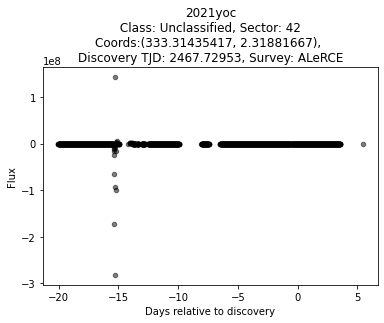

In [5]:
curve = sigma_clip(curve, "e_cts")

display_curve("cts", "e_cts")

In [6]:
curve

,BTJD,TJD,cts,e_cts,bkg,bkg_model,bkg2,e_bkg2,relative_time
relative_time,,,,,,,,,
-21 days +22:59:38.112000,2447.69669,2447.68761,-1129.9240,740.9063,-520.9957,-375.4020,-836.0190,740.9063,-20.04192
-21 days +23:09:38.592000,2447.70363,2447.69456,-337.7922,734.4452,775.8164,-375.4020,-375.4020,734.4452,-20.03497
-21 days +23:19:38.208000,2447.71058,2447.70150,-108.9524,740.4471,293.9838,-349.8900,770.6932,740.4471,-20.02803
-21 days +23:29:38.688000,2447.71752,2447.70845,2059.0641,736.8446,-193.6647,-349.8900,479.3209,736.8446,-20.02108
-21 days +23:39:38.304000,2447.72447,2447.71539,-785.5123,736.4696,401.6610,-349.8900,-349.8900,736.4696,-20.01414
...,...,...,...,...,...,...,...,...,...
3 days 12:49:37.344000,2471.27289,2471.26399,-984.1628,892.8798,-21779.1473,-894.9519,-217.1850,892.8798,3.53446
3 days 12:59:37.823999999,2471.27983,2471.27094,-1080.6254,910.6169,-21718.9350,-894.9519,1.6307,910.6169,3.54141
3 days 13:09:37.440000,2471.28678,2471.27788,-4628.6167,928.8173,-21761.1101,-894.9519,-1216.5665,928.8173,3.54835


## 2. Subtract background Flux, apply cts sigma clipping

<AxesSubplot:title={'center':'2021yoc\n Class: Unclassified, Sector: 42 \nCoords:(333.31435417, 2.31881667), \nDiscovery TJD: 2467.72953, Survey: ALeRCE'}, xlabel='Days relative to discovery', ylabel='Flux'>

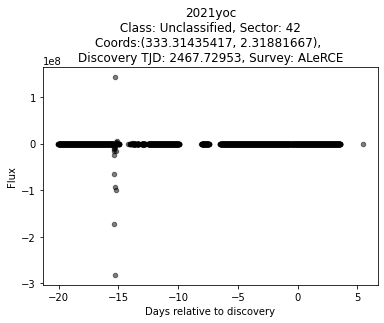

In [7]:
curve['no_bkg_cts'] = curve['cts'] - curve['bkg_model']
display_curve('no_bkg_cts', "e_cts")

<AxesSubplot:title={'center':'2021yoc\n Class: Unclassified, Sector: 42 \nCoords:(333.31435417, 2.31881667), \nDiscovery TJD: 2467.72953, Survey: ALeRCE'}, xlabel='Days relative to discovery', ylabel='Flux'>

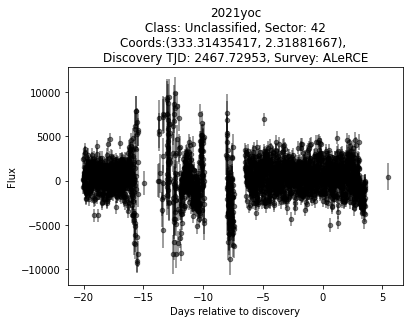

In [8]:
for _ in range(0, 5):
    cts_mean = curve.no_bkg_cts.mean()
    cts_threshold = 3*curve.no_bkg_cts.std()
    curve = curve[np.abs(curve['no_bkg_cts'] - cts_mean) <= cts_threshold]

display_curve('no_bkg_cts', "e_cts")

## 3. Correct for milky way extinction using Fitzpatrick Reddening function
Wavelength of TESS bandpass is between 600-1000nm, central wavelength is 786.5nm

C:\Users\Hali Huang\AppData\Local\Temp\ipykernel_12840\2672649930.py:2: DeprecationWarning: the ``irsa_dust`` module has been moved to astroquery.ipac.irsa.irsa_dust, please update your imports.
  from astroquery.irsa_dust import IrsaDust


<AxesSubplot:title={'center':'2021yoc\n Class: Unclassified, Sector: 42 \nCoords:(333.31435417, 2.31881667), \nDiscovery TJD: 2467.72953, Survey: ALeRCE\nmwebw:0.0402'}, xlabel='Days relative to discovery', ylabel='Flux'>

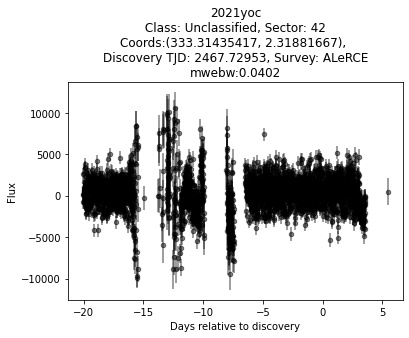

In [9]:
import extinction
from astroquery.irsa_dust import IrsaDust
import astropy.coordinates as coord
import astropy.units as u

# Set relevant parameters
ra = curve_meta["ra"].iloc[0]
dec = curve_meta["dec"].iloc[0]
flux_in = curve['no_bkg_cts']
fluxerr_in = curve["e_cts"]
bandpass_wavelengths = np.array([7865,])


# Get Milky Way E(B-V) Extinction
coo = coord.SkyCoord(ra * u.deg, dec * u.deg, frame='icrs')
dust = IrsaDust.get_query_table(coo, section='ebv')
mwebv = dust['ext SandF mean'][0]


# Remove extinction from light curves (Using negative a_v so that extinction.apply works in reverse and removes the extinction)
extinction_per_passband = extinction.fitzpatrick99(wave=bandpass_wavelengths, a_v=-3.1 * mwebv, r_v=3.1, unit='aa')
flux_out = extinction.apply(extinction_per_passband[0], flux_in, inplace=False)
fluxerr_out = extinction.apply(extinction_per_passband[0], fluxerr_in, inplace=False)

curve['unreddened_cts'] = flux_out
curve['unreddened_ects'] = fluxerr_out

display_curve('unreddened_cts', 'unreddened_ects', f"\nmwebw:{mwebv}")

In [10]:
#display all data
curve

,BTJD,TJD,cts,e_cts,bkg,bkg_model,bkg2,e_bkg2,relative_time,no_bkg_cts,unreddened_cts,unreddened_ects
relative_time,,,,,,,,,,,,
-21 days +22:59:38.112000,2447.69669,2447.68761,-1129.9240,740.9063,-520.9957,-375.4020,-836.0190,740.9063,-20.04192,-754.5220,-805.474374,790.939215
-21 days +23:09:38.592000,2447.70363,2447.69456,-337.7922,734.4452,775.8164,-375.4020,-375.4020,734.4452,-20.03497,37.6098,40.149565,784.041801
-21 days +23:19:38.208000,2447.71058,2447.70150,-108.9524,740.4471,293.9838,-349.8900,770.6932,740.4471,-20.02803,240.9376,257.207958,790.449005
-21 days +23:29:38.688000,2447.71752,2447.70845,2059.0641,736.8446,-193.6647,-349.8900,479.3209,736.8446,-20.02108,2408.9541,2571.629185,786.603231
-21 days +23:39:38.304000,2447.72447,2447.71539,-785.5123,736.4696,401.6610,-349.8900,-349.8900,736.4696,-20.01414,-435.6223,-465.039587,786.202908
...,...,...,...,...,...,...,...,...,...,...,...,...
3 days 12:49:37.344000,2471.27289,2471.26399,-984.1628,892.8798,-21779.1473,-894.9519,-217.1850,892.8798,3.53446,-89.2109,-95.235253,953.175385
3 days 12:59:37.823999999,2471.27983,2471.27094,-1080.6254,910.6169,-21718.9350,-894.9519,1.6307,910.6169,3.54141,-185.6735,-198.211909,972.110260
3 days 13:09:37.440000,2471.28678,2471.27788,-4628.6167,928.8173,-21761.1101,-894.9519,-1216.5665,928.8173,3.54835,-3733.6648,-3985.796727,991.539721


## 4. Normalize

<AxesSubplot:title={'center':'2021yoc\n Class: Unclassified, Sector: 42 \nCoords:(333.31435417, 2.31881667), \nDiscovery TJD: 2467.72953, Survey: ALeRCE'}, xlabel='Days relative to discovery', ylabel='Flux'>

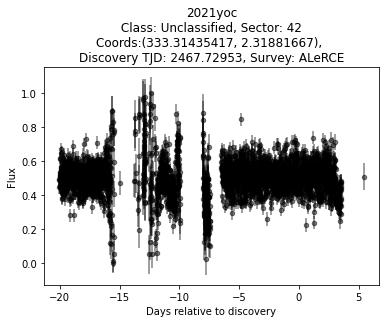

In [11]:
curve['normalized_cts'] = (curve.unreddened_cts - curve.unreddened_cts.min()) / (curve.unreddened_cts.max()-curve.unreddened_cts.min())
curve['normalized_ects'] = curve['unreddened_ects'] / (curve.unreddened_cts.max()-curve.unreddened_cts.min())
# curve.plot.scatter(x="BTJD", y='normalized_cts', c="00000", alpha=0.5, ylabel="Flux", xlabel="Barycentric TESS Julian Date")
display_curve('normalized_cts', 'normalized_ects')

## 5. Bin Data
bins the data into 1 day intervals and takes the mean of each bin

In [12]:
#square e_cts to get variances
binned = bin_curves(curve, "1D")
binned = binned.fillna(0)
binned

,BTJD,TJD,cts,e_cts,bkg,bkg_model,bkg2,e_bkg2,relative_time,no_bkg_cts,unreddened_cts,unreddened_ects,normalized_cts,normalized_ects
relative_time,,,,,,,,,,,,,,
-20.0,2447.967526,2447.958448,500.457075,729.098348,-26.288218,30.640125,68.091462,729.062875,-19.771082,469.816949,501.543379,778.296011,0.508755,0.038057
-19.0,2448.741839,2448.732753,556.769130,738.192616,-149.453141,94.318503,139.344063,738.166941,-18.996777,462.450627,493.679614,788.014869,0.508371,0.038532
-18.0,2449.741846,2449.732753,318.889681,742.251678,-411.398255,39.252969,82.751683,742.219026,-17.996777,279.636712,298.520395,792.340589,0.498828,0.038744
-17.0,2450.741851,2450.732752,253.822419,748.615350,-932.156702,6.958280,-23.158531,748.583941,-16.996778,246.864140,263.534713,799.135322,0.497117,0.039076
-16.0,2451.683891,2451.674787,-1388.843338,1052.785831,28050.904392,-1645.226406,-1386.998624,1005.600285,-16.054743,256.383068,273.696448,1073.507810,0.497614,0.052492
-15.0,2452.346022,2452.336918,-24138.958083,1537.980813,220661.531650,-24671.521533,-24311.856567,1530.806067,-15.392612,532.563450,568.527109,1634.180393,0.512031,0.079908
-14.0,2454.024267,2454.015158,46563.139567,1989.736559,475538.119500,43416.619300,46625.231133,1986.637117,-13.714372,3146.520267,3359.002710,2120.793414,0.648479,0.103702
-13.0,2454.757628,2454.748521,1581.047010,2079.751044,-41363.832585,-884.537660,-1161.820550,2078.430212,-12.981009,2465.584671,2632.083981,2218.785237,0.612934,0.108494
-12.0,2455.810536,2455.801431,31.029525,1246.292524,-12834.963262,384.695703,319.968813,1174.511132,-11.928099,-353.666178,-377.549022,1253.825096,0.465770,0.061309


<AxesSubplot:title={'center':'2021yoc\n Class: Unclassified, Sector: 42 \nCoords:(333.31435417, 2.31881667), \nDiscovery TJD: 2467.72953, Survey: ALeRCE'}, xlabel='Days relative to discovery', ylabel='Flux'>

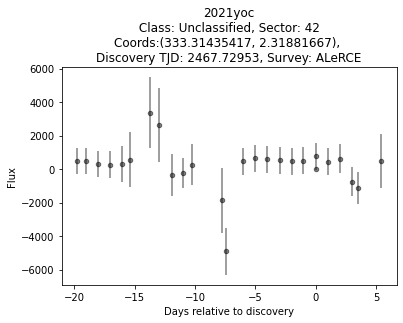

In [13]:
binned.plot.scatter(x="relative_time", y='unreddened_cts', c="00000", alpha=0.5, yerr=binned['unreddened_ects'], ylabel="Flux", xlabel="Days relative to discovery", title=plot_title)

# Find training labels
## 1. Max Light

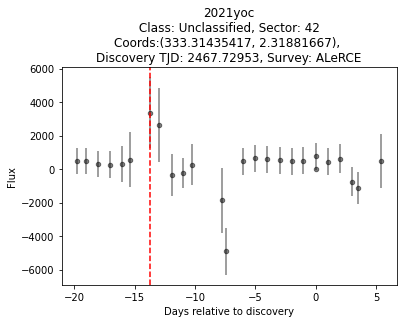

In [14]:
id_max = binned['unreddened_cts'].idxmax()
max_data = binned.loc[id_max, :]
t_max = max_data['relative_time']

ax = binned.plot.scatter(x="relative_time", y='unreddened_cts', c="00000", alpha=0.5, yerr=binned['unreddened_ects'], ylabel="Flux", xlabel="Days relative to discovery", title=plot_title)
ax.axvline(t_max, color="red", linestyle="--")

## 2. Explosion Time